In [9]:
import torch
print(torch.cuda.is_available())

True


In [3]:
# ! pip install -Uqq fastbook
# ! pip install fastbook

In [1]:
! pip install -Uqq utils

In [7]:
print('a')

a


In [2]:
import fastbook
fastbook.setup_book()

In [3]:
from fastai.vision.all import *

In [4]:
path = untar_data(URLs.PETS)

In [5]:
Path.BASE_PATH = path

In [6]:
path.ls()

(#2) [Path('annotations'),Path('images')]

In [7]:
(path/"images").ls()

(#7393) [Path('images/British_Shorthair_163.jpg'),Path('images/Persian_16.jpg'),Path('images/pomeranian_26.jpg'),Path('images/beagle_147.jpg'),Path('images/Birman_76.jpg'),Path('images/Maine_Coon_85.jpg'),Path('images/yorkshire_terrier_135.jpg'),Path('images/Bombay_140.jpg'),Path('images/British_Shorthair_6.jpg'),Path('images/wheaten_terrier_21.jpg')...]

In [8]:
fname = (path/"images").ls()[0]

In [9]:
fname.name

'British_Shorthair_163.jpg'

In [10]:
re.findall(r'(.+)_\d+.jpg$', fname.name)

['British_Shorthair']

In [11]:
pets = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files,  
    splitter=RandomSplitter(seed=42), 
    get_y=using_attr(RegexLabeller(r'(.+)_\d+.jpg$'), 'name'), 
    item_tfms=Resize(460), 
    batch_tfms=aug_transforms(size=224, min_scale=75)
)

In [12]:
dls = pets.dataloaders(path/"images")

In [13]:
(path/"images").ls()

(#7393) [Path('images/British_Shorthair_163.jpg'),Path('images/Persian_16.jpg'),Path('images/pomeranian_26.jpg'),Path('images/beagle_147.jpg'),Path('images/Birman_76.jpg'),Path('images/Maine_Coon_85.jpg'),Path('images/yorkshire_terrier_135.jpg'),Path('images/Bombay_140.jpg'),Path('images/British_Shorthair_6.jpg'),Path('images/wheaten_terrier_21.jpg')...]

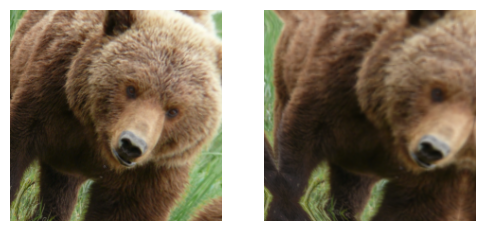

In [67]:
dblock1 = DataBlock(blocks=(ImageBlock(), CategoryBlock()),
                   get_y=parent_label,
                   item_tfms=Resize(460))

dls1 = dblock1.dataloaders([(Path.cwd()/'ignore'/'images'/'grizzly.jpg')]*10, bs=8)
dls1.train.get_idxs = lambda: Inf.ones
x,y = dls1.valid.one_batch()
_,axs = subplots(1, 2)

x1 = TensorImage(x.clone())
x1 = x1.affine_coord(sz=224)
x1 = x1.rotate(draw=30, p=1.)
x1 = x1.zoom(draw=1.2, p=1.)
x1 = x1.warp(draw_x=-0.2, draw_y=0.2, p=1.)

tfms = setup_aug_tfms([Rotate(draw=30, p=1, size=224), Zoom(draw=1.2, p=1., size=224),
                       Warp(draw_x=-0.2, draw_y=0.2, p=1., size=224)])
x = Pipeline(tfms)(x)
TensorImage(x[1]).show(ctx=axs[0])
TensorImage(x1[0]).show(ctx=axs[1]);
     

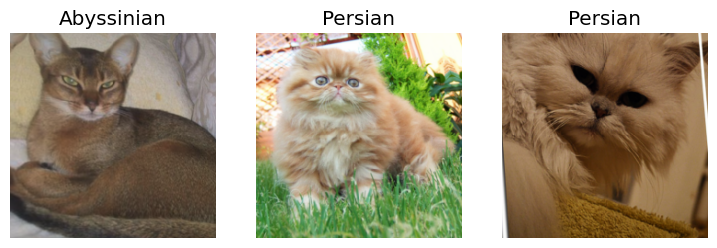

In [20]:
dls.show_batch(nrows=1, ncols=3)

In [69]:
pets1 = DataBlock(blocks = (ImageBlock, CategoryBlock),
                 get_items=get_image_files, 
                 splitter=RandomSplitter(seed=42),
                 get_y=using_attr(RegexLabeller(r'(.+)_\d+.jpg$'), 'name'))
pets1.summary(path/"images")

Setting-up type transforms pipelines
Found 7390 items
2 datasets of sizes 5912,1478
Setting up Pipeline: PILBase.create
Setting up Pipeline: partial -> Categorize -- {'vocab': None, 'sort': True, 'add_na': False}

Building one sample
  Pipeline: PILBase.create
    starting from
      /root/.fastai/data/oxford-iiit-pet/images/Ragdoll_143.jpg
    applying PILBase.create gives
      PILImage mode=RGB size=500x383
  Pipeline: partial -> Categorize -- {'vocab': None, 'sort': True, 'add_na': False}
    starting from
      /root/.fastai/data/oxford-iiit-pet/images/Ragdoll_143.jpg
    applying partial gives
      Ragdoll
    applying Categorize -- {'vocab': None, 'sort': True, 'add_na': False} gives
      TensorCategory(8)

Final sample: (PILImage mode=RGB size=500x383, TensorCategory(8))


Found 7390 items
2 datasets of sizes 5912,1478
Setting up Pipeline: PILBase.create
Setting up Pipeline: partial -> Categorize -- {'vocab': None, 'sort': True, 'add_na': False}
Setting up after_item: Pipelin

RuntimeError: Error when trying to collate the data into batches with fa_collate, at least two tensors in the batch are not the same size.

Mismatch found on axis 0 of the batch and is of type `TensorImage`:
	Item at index 0 has shape: torch.Size([3, 383, 500])
	Item at index 1 has shape: torch.Size([3, 333, 500])

Please include a transform in `after_item` that ensures all data of type TensorImage is the same size

In [21]:
learn = vision_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(2)

Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /home/ubuntu/.cache/torch/hub/checkpoints/resnet34-b627a593.pth
100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 83.3M/83.3M [00:00<00:00, 149MB/s]


epoch,train_loss,valid_loss,error_rate,time
0,1.531480,0.295727,0.099459,00:15


epoch,train_loss,valid_loss,error_rate,time
0,0.495509,0.322648,0.095399,00:19
1,0.320240,0.187320,0.064953,00:19


In [14]:
x, y = dls.one_batch()

In [15]:
y

TensorCategory([12,  6, 10, 23,  1, 13, 12,  8, 13, 36,  1, 29, 21, 23, 36, 12, 27, 19, 31, 18, 33, 33,  4, 28,  7,  5,  4,  4, 26, 14, 14, 16, 17, 14, 31, 33, 34, 21, 14,  3, 32, 14, 31,  1,  3, 23,
                10, 14, 29, 35, 28, 31, 34, 19, 35, 34, 30, 26, 34, 23, 24, 13, 14, 10])

In [24]:
preds, _ = learn.get_preds(dl=[(x,y)])

In [25]:
preds[0]

tensor([3.3796e-07, 1.8783e-04, 2.0546e-08, 1.8341e-06, 6.3715e-06, 9.9940e-01, 1.1695e-06, 3.3776e-07, 6.9078e-08, 3.7984e-04, 8.4889e-08, 1.6317e-05, 1.6314e-08, 1.5436e-08, 1.6575e-08, 2.4374e-08,
        8.7000e-09, 1.8822e-08, 3.4642e-08, 2.9424e-06, 1.4470e-06, 4.1919e-08, 9.1288e-09, 1.6375e-07, 2.0402e-08, 4.4622e-09, 2.8498e-08, 3.0107e-07, 3.2312e-08, 6.0364e-08, 1.8401e-08, 2.4948e-07,
        3.1209e-07, 1.2745e-08, 1.9759e-09, 5.2718e-08, 4.2819e-09])

In [26]:
len(preds[0]), preds[0].sum()

(37, tensor(1.0000))

In [27]:
torch.random.manual_seed(42);

In [28]:

acts = torch.randn((6,2))*2
acts

tensor([[ 0.6734,  0.2576],
        [ 0.4689,  0.4607],
        [-2.2457, -0.3727],
        [ 4.4164, -1.2760],
        [ 0.9233,  0.5347],
        [ 1.0698,  1.6187]])

In [29]:
acts.sigmoid()

tensor([[0.6623, 0.5641],
        [0.6151, 0.6132],
        [0.0957, 0.4079],
        [0.9881, 0.2182],
        [0.7157, 0.6306],
        [0.7446, 0.8346]])

In [30]:
acts[:,0]

tensor([ 0.6734,  0.4689, -2.2457,  4.4164,  0.9233,  1.0698])

In [31]:
(acts[:,0]-acts[:,1]).sigmoid()

tensor([0.6025, 0.5021, 0.1332, 0.9966, 0.5959, 0.3661])

In [32]:
sm_acts = torch.softmax(acts, dim=1)
sm_acts

tensor([[0.6025, 0.3975],
        [0.5021, 0.4979],
        [0.1332, 0.8668],
        [0.9966, 0.0034],
        [0.5959, 0.4041],
        [0.3661, 0.6339]])

In [33]:
targ = tensor([0,1,0,1,1,0])

In [34]:
sm_acts

tensor([[0.6025, 0.3975],
        [0.5021, 0.4979],
        [0.1332, 0.8668],
        [0.9966, 0.0034],
        [0.5959, 0.4041],
        [0.3661, 0.6339]])

In [35]:
idx = range(6)
sm_acts[idx, targ]

tensor([0.6025, 0.4979, 0.1332, 0.0034, 0.4041, 0.3661])

In [36]:
# from IPython.display import HTML
from IPython.display import display, HTML

df = pd.DataFrame(sm_acts, columns=["3","7"])
df['targ'] = targ
df['idx'] = idx
df['result'] = sm_acts[range(6), targ]
# t = df.style.hide_index()
# t = df.hide_index()
html = df.to_html(index=False)
#To have html code compatible with our script
# html = t._repr_html_().split('')[1]
# html = re.sub(r'', r'', html)
display(HTML(html))

3,7,targ,idx,result
0.602469,0.397531,0,0,0.602469
0.502065,0.497935,1,1,0.497935
0.133188,0.866811,0,2,0.133188
0.996640,0.003360,1,3,0.003360
0.595949,0.404051,1,4,0.404051
0.366118,0.633882,0,5,0.366118


In [37]:
-sm_acts[idx, targ]

tensor([-0.6025, -0.4979, -0.1332, -0.0034, -0.4041, -0.3661])

In [38]:
F.nll_loss(sm_acts, targ, reduction='none')

tensor([-0.6025, -0.4979, -0.1332, -0.0034, -0.4041, -0.3661])

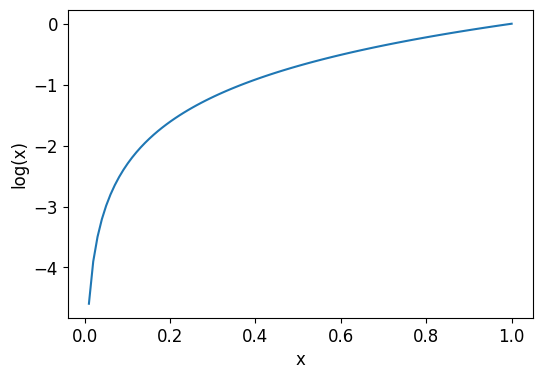

In [39]:
from fastbook import plot_function
plot_function(torch.log, min=0,max=1, ty='log(x)', tx='x')
# fastbook.plot_function

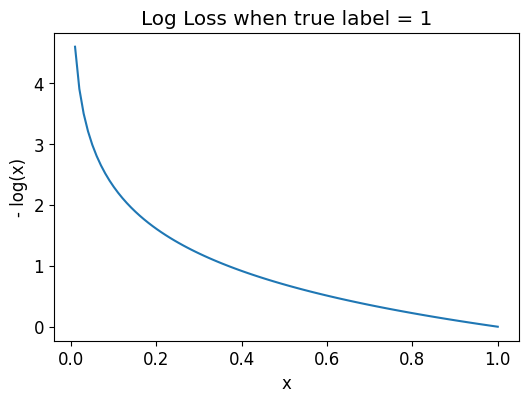

In [40]:
plot_function(lambda x: -1*torch.log(x), min=0,max=1, tx='x', ty='- log(x)', title = 'Log Loss when true label = 1')

In [41]:

#hide_input
from IPython.display import HTML
df['loss'] = -torch.log(tensor(df['result']))
# t = df.style.hide_index()
#To have html code compatible with our script
# html = t._repr_html_().split('')[1]
# html = re.sub(r'', r'', html)
html = df.to_html(index=False)
display(HTML(html))


3,7,targ,idx,result,loss
0.602469,0.397531,0,0,0.602469,0.506720
0.502065,0.497935,1,1,0.497935,0.697285
0.133188,0.866811,0,2,0.133188,2.015990
0.996640,0.003360,1,3,0.003360,5.695763
0.595949,0.404051,1,4,0.404051,0.906213
0.366118,0.633882,0,5,0.366118,1.004798


In [42]:
loss_func = nn.CrossEntropyLoss()

In [43]:
loss_func(acts, targ)


tensor(1.8045)

In [44]:
F.cross_entropy(acts, targ)

tensor(1.8045)

In [45]:
nn.CrossEntropyLoss(reduction='none')(acts, targ)

tensor([0.5067, 0.6973, 2.0160, 5.6958, 0.9062, 1.0048])

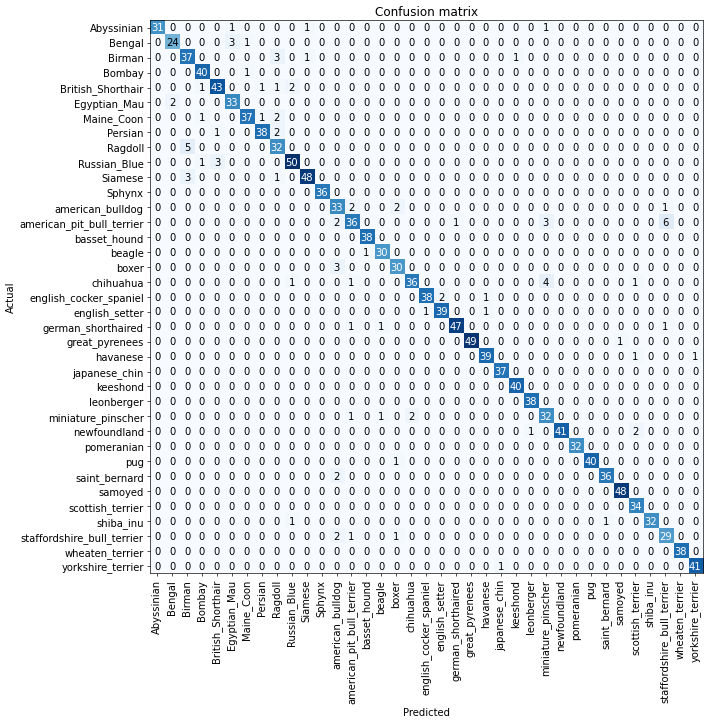

In [46]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [47]:
interp.most_confused(min_val=5)

[('american_pit_bull_terrier', 'staffordshire_bull_terrier', 6),
 ('Ragdoll', 'Birman', 5)]

In [48]:
learn = vision_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(1, base_lr=0.1)

epoch,train_loss,valid_loss,error_rate,time
0,2.612576,3.584231,0.410014,00:15


epoch,train_loss,valid_loss,error_rate,time
0,3.097880,1.333637,0.389716,00:19


/home/ubuntu/miniconda3/envs/te1/lib/python3.12/site-packages/fastai/learner.py:51: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state = torch.load(file, map_location=devic

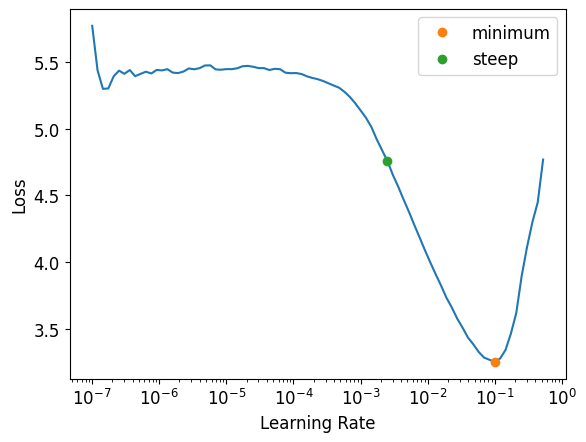

In [49]:
learn = vision_learner(dls, resnet34, metrics=error_rate)
lr_min,lr_steep = learn.lr_find(suggest_funcs=(minimum, steep))

In [50]:
print(f"Minimum/10: {lr_min:.2e}, steepest point: {lr_steep:.2e}")

Minimum/10: 1.00e-02, steepest point: 2.51e-03


In [51]:
learn = vision_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(2, base_lr=3e-3)

epoch,train_loss,valid_loss,error_rate,time
0,1.300113,0.316814,0.102165,00:15


epoch,train_loss,valid_loss,error_rate,time
0,0.524416,0.382955,0.125169,00:19
1,0.290419,0.176429,0.057510,00:19


In [52]:
learn = vision_learner(dls, resnet34, metrics=error_rate)
learn.fit_one_cycle(3, 3e-3)

epoch,train_loss,valid_loss,error_rate,time
0,1.133403,0.380024,0.112314,00:15
1,0.524471,0.231906,0.075101,00:15
2,0.334392,0.206698,0.068336,00:15


In [53]:
learn.unfreeze()


SuggestedLRs(valley=0.00010964782268274575)

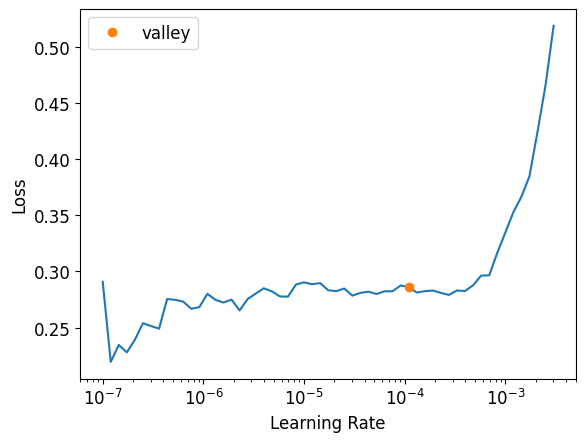

In [54]:
learn.lr_find()

In [55]:
learn.fit_one_cycle(6, lr_max=1e-5)

epoch,train_loss,valid_loss,error_rate,time
0,0.252027,0.197650,0.063599,00:19
1,0.232479,0.184003,0.061570,00:19
2,0.217740,0.176499,0.059540,00:19
3,0.186515,0.174859,0.057510,00:19
4,0.183309,0.168442,0.056834,00:19
5,0.180780,0.170485,0.054804,00:19


In [56]:
learn = vision_learner(dls, resnet34, metrics=error_rate)
learn.fit_one_cycle(3, 3e-3)
learn.unfreeze()
learn.fit_one_cycle(12, lr_max=slice(1e-6,1e-4))

epoch,train_loss,valid_loss,error_rate,time
0,1.142740,0.251814,0.087280,00:15
1,0.532807,0.236255,0.074425,00:15
2,0.323950,0.179085,0.062923,00:15


epoch,train_loss,valid_loss,error_rate,time
0,0.264110,0.173691,0.062923,00:19
1,0.242586,0.160920,0.057510,00:19
2,0.212859,0.162807,0.056157,00:19
3,0.214639,0.155935,0.057510,00:19
4,0.163653,0.154929,0.054127,00:19
5,0.161822,0.151736,0.056157,00:19
6,0.145291,0.147058,0.052774,00:19
7,0.137517,0.141311,0.050744,00:19
8,0.132461,0.144041,0.050068,00:19
9,0.112487,0.143594,0.052774,00:19


<Axes: title={'center': 'learning curve'}, xlabel='steps', ylabel='loss'>

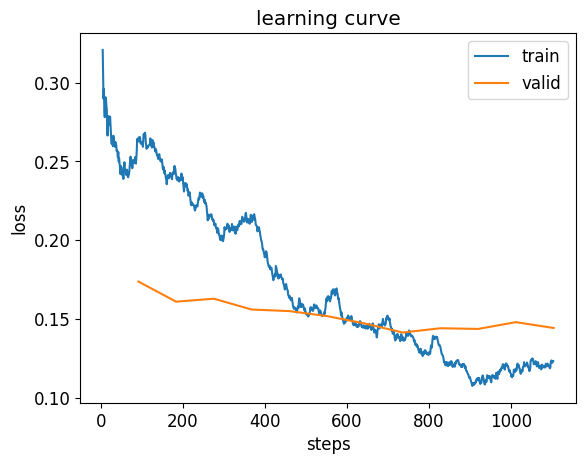

In [57]:
learn.recorder.plot_loss()

In [58]:
from fastai.callback.fp16 import *
learn = vision_learner(dls, resnet50, metrics=error_rate).to_fp16()
learn.fine_tune(6, freeze_epochs=3)

Downloading: "https://download.pytorch.org/models/resnet50-11ad3fa6.pth" to /home/ubuntu/.cache/torch/hub/checkpoints/resnet50-11ad3fa6.pth
100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 97.8M/97.8M [00:01<00:00, 89.1MB/s]
/home/ubuntu/miniconda3/envs/te1/lib/python3.12/site-packages/fastai/callback/fp16.py:45: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  self.autocast,self.learn.scaler,self.scales = autocast(dtype=dtype),GradScaler(**self.kwargs),L()
/home/ubuntu/miniconda3/envs/te1/lib/python3.12/site-packages/fastai/callback/fp16.py:45: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  self.autocast,self.learn.scaler,self.scales = autocast(dtype=dtype),GradScaler(**self.kwargs),L()


epoch,train_loss,valid_loss,error_rate,time
0,2.174092,0.445410,0.125846,00:17
1,0.849743,0.317580,0.106901,00:17
2,0.541703,0.297493,0.110961,00:17


epoch,train_loss,valid_loss,error_rate,time
0,0.276391,0.185708,0.061570,00:20
1,0.243748,0.203843,0.070365,00:20
2,0.177465,0.171552,0.053451,00:20
3,0.125094,0.177337,0.054127,00:20
4,0.088848,0.166879,0.052774,00:20
5,0.064804,0.166322,0.050068,00:20
